In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns
from matplotlib_venn import venn3

In [5]:
gencode = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/human.gencode.v37.annotation.bed', encoding = 'utf8')
gencode

,Chrm,Start,End,Gene ID,Gene Name,Strand
0,chr1,11868,14409,ENSG00000223972.5,DDX11L1,+
1,chr1,14403,29570,ENSG00000227232.5,WASH7P,-
2,chr1,17368,17436,ENSG00000278267.1,MIR6859-1,-
3,chr1,29553,31109,ENSG00000243485.5,MIR1302-2HG,+
4,chr1,30365,30503,ENSG00000284332.1,MIR1302-2,+
...,...,...,...,...,...,...
60646,chrM,14148,14673,ENSG00000198695.2,MT-ND6,-
60647,chrM,14673,14742,ENSG00000210194.1,MT-TE,-
60648,chrM,14746,15887,ENSG00000198727.2,MT-CYB,+
60649,chrM,15887,15953,ENSG00000210195.2,MT-TT,+


In [9]:
#Abrir o ficheiro
allgenes = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/allgenes_foxo4_pituitary.csv', encoding = 'utf8', sep =";")
#allgenes.set_index("Gene ID",inplace = True)
allgenes['nlog10'] = -np.log10((allgenes['adj.P.Val']))
allgenes

,Gene ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,nlog10
0,ENSG00000120314.18,-0.193634,5.328176,-3.933184,0.000126,0.689827,0.458223,0.161260
1,ENSG00000213760.11,0.284191,3.569823,3.770109,0.000231,0.689827,-0.357744,0.161260
2,ENSG00000236540.7,-0.181807,5.196602,-3.620245,0.000398,0.689827,-0.408413,0.161260
3,ENSG00000165688.12,-0.179369,5.899394,-3.575031,0.000467,0.689827,-0.456885,0.161260
4,ENSG00000269001.2,0.355204,3.380757,3.750804,0.000248,0.689827,-0.460587,0.161260
...,...,...,...,...,...,...,...,...
27967,ENSG00000075624.17,0.013622,9.788635,0.146422,0.883778,0.981721,-5.592475,0.008012
27968,ENSG00000167658.16,-0.001161,9.952183,-0.027849,0.977818,0.996698,-5.607638,0.001436
27969,ENSG00000115138.11,-0.155525,14.020702,-0.491365,0.623860,0.926565,-5.635458,0.033124
27970,ENSG00000272168.8,-0.089282,14.715535,-0.306445,0.759675,0.954115,-5.720102,0.020399


In [10]:
genes = pd.merge (gencode, allgenes)
genes.set_index("Gene Name", inplace = True)
genes = genes.drop(columns = ['Chrm', 'Start', 'End', 'Strand'])
genes ['valor'] = (np.sign(genes ['logFC']) - genes['nlog10'])
genes

,Gene ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,nlog10,valor
Gene Name,,,,,,,,,
WASH7P,ENSG00000227232.5,-0.111081,4.405056,-1.344318,0.180801,0.768716,-4.625775,0.114234,-1.114234
MIR6859-1,ENSG00000278267.1,-0.070322,-0.405375,-0.668388,0.504876,0.891928,-4.810939,0.049670,-1.049670
AL627309.1,ENSG00000238009.6,-0.197223,-0.621394,-1.236863,0.218001,0.786511,-4.551954,0.104295,-1.104295
AL627309.6,ENSG00000268903.1,-0.290586,1.645370,-1.553972,0.122222,0.736778,-4.331985,0.132663,-1.132663
AL627309.7,ENSG00000269981.1,-0.246027,0.888383,-1.342867,0.181270,0.768826,-4.500263,0.114172,-1.114172
...,...,...,...,...,...,...,...,...,...
AC010889.1,ENSG00000260197.1,-0.569758,1.057613,-1.088298,0.278146,0.814448,-4.675075,0.089137,-1.089137
KDM5D,ENSG00000012817.16,-0.590447,3.205472,-1.028502,0.305309,0.830223,-4.822147,0.080805,-1.080805
AC010889.2,ENSG00000288049.1,-0.411014,-0.252319,-0.899632,0.369706,0.853566,-4.729274,0.068763,-1.068763


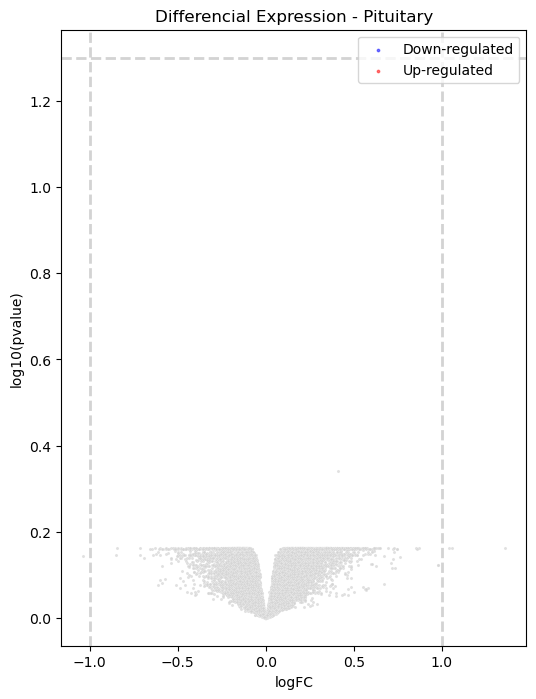

In [13]:
plt.figure(figsize = (6,8))

ax = sns.scatterplot(data = genes, x= 'logFC', y = 'nlog10', color = 'lightgray', s =5, alpha =0.7)
plt.title ('Differencial Expression - Pituitary')
plt.ylabel ('log10(pvalue)')

down = genes[(genes['logFC']<=-1)&(genes['nlog10']>= -np.log10(0.05))]
up = genes[(genes['logFC']>=1)&(genes['nlog10']>= -np.log10(0.05))]

plt.scatter(x=down['logFC'],y=down['nlog10'],s=3,label="Down-regulated",color="blue", alpha = 0.5)
plt.scatter(x=up['logFC'],y=up['nlog10'],s=3,label="Up-regulated",color="red", alpha = 0.5)

down1 = genes[(genes['logFC']<=-1)&(genes['nlog10']>= 1.4)]
up1 = genes[(genes['logFC']>=1)&(genes['nlog10'] >= 6.9)]

for i,r in up1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)

for i,r in down1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)


ax.axhline (-np.log10(0.05), zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (-1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
plt.legend(loc = 'upper right')

In [12]:
#Criar tabela para a análise GSEA
enr = pd.merge (gencode, allgenes)
enr ['valor'] = (np.sign(enr ['logFC'])* -np.log10(enr['adj.P.Val']))
enr1 = pd.DataFrame ([enr['Gene Name'], enr ['valor']])
enr1 = enr1.T
enr1= enr1.sort_values(by='valor')
enr1.to_csv('Gene_Analysis_foxo4_pituitary.rnk', sep='\t', header= False, index= False)
enr1

,Gene Name,valor
10323,ASL,-0.16126
2913,AC074117.1,-0.16126
10099,GARS1,-0.16126
25548,ABHD12,-0.16126
9094,AL355802.3,-0.16126
...,...,...
23232,SMAD2,0.16126
12396,CHMP5,0.16126
6947,GUCY1A1,0.16126
27668,EIF4BP7,0.16126


C:\Users\beatr\AppData\Local\Temp\ipykernel_2392\4028365514.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  foxo3_01 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Age_Group/FOXO4/network_pituitary_V$FOXO3_01.csv', sep = ', ')
C:\Users\beatr\AppData\Local\Temp\ipykernel_2392\4028365514.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  foxo4_02 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Age_Group/FOXO4/network_pituitary_V$FOXO4_02.csv', sep = ', ')
C:\Users\bea

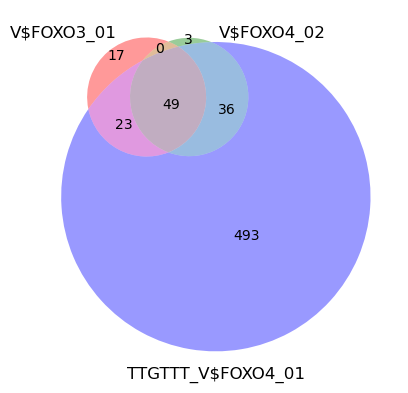

In [4]:
#Diagrama de Venn
foxo3_01 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Age_Group/FOXO4/network_pituitary_V$FOXO3_01.csv', sep = ', ')
foxo4_02 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Age_Group/FOXO4/network_pituitary_V$FOXO4_02.csv', sep = ', ')
foxo4_01 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Age_Group/FOXO4/network_pituitary_V$FOXO4_01.csv', sep = ', ')

set1 = set(foxo3_01['User ID'])
set2 = set(foxo4_02['User ID'])
set3 = set(foxo4_01['User ID'])

venn3([set1, set2, set3], ('V$FOXO3_01', 'V$FOXO4_02','TTGTTT_V$FOXO4_01'))
plt.savefig('Venn_FOXO4_pituitary.png', format = 'png', dpi = 1200, bbox_inches ='tight')
plt.show()